In [3]:
import pandas as pd
import numpy as np

# Load original file
df_raw = pd.read_excel("/content/unstructured_amazon_sales_data_2025.xlsx")

# Show original data (first few rows)
print("Original Data:")
print(df_raw.head())

# Create a working copy to clean
df = df_raw.copy()

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Clean 'price($)' column
df['price'] = df['price($)'].str.replace('$', '', regex=False).astype(float)

# Clean 'qty' column
df['quantity'] = df['qty'].str.extract('(\d+)').astype(int)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

# Drop rows with missing/invalid dates
df.dropna(subset=['date'], inplace=True)

# Standardize 'payment' and 'order_status'
df['payment'] = df['payment'].str.title()
df['order_status'] = df['order_status'].str.title()

# Drop unnecessary original columns
df.drop(columns=['price($)', 'qty'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Add year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Show cleaned data
print("\nCleaned Data:")
print(df.head())

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
# Use the cleaned column names: 'price', 'quantity', 'total_sales'
cluster_data = df[['price', 'quantity', 'total_sales']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# View cluster distribution
print(df['Cluster'].value_counts())

Original Data:
  Order ID        Date       Product     Category Price($)    Qty  \
0    A2002  07/03/2025     USB Cable  Accessories   $99.36  3 pcs   
1    A8893  02/03/2025    Phone Case  Accessories   $81.17  1 pcs   
2    A3615  13/02/2025  Coffee Maker         Home   $455.0  1 pcs   
3    A4764  14/01/2025  Sofa Cushion    Furniture  $226.78  1 pcs   
4    A9773  31/01/2025    Smartphone  Electronics  $180.82  5 pcs   

   Total Sales   Customer Name Customer Location           Payment  \
0       298.08    James Santos          Michigan  Cash On Delivery   
1        81.17   Edwin Gregory     New Hampshire       Credit Card   
2       455.00       Anna Rice      South Dakota  Cash On Delivery   
3       226.78  Patrick Cortez             Maine  Cash On Delivery   
4       904.10  Joseph Bennett          Virginia        Debit Card   

  Order_Status  
0      Shipped  
1      Pending  
2    Delivered  
3      Shipped  
4     Returned  

Cleaned Data:
  order_id       date       prod

In [4]:
import pandas as pd
import numpy as np

# Load original file
df= pd.read_excel("/content/unstructured_amazon_sales_data_2025.xlsx")

top_products = df.groupby('Product')['Qty'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Quantity Sold:\n", top_products)


# Show cleaned data
print("\n Data:")
print(df)

Top 5 Products by Quantity Sold:
 Product
Air Fryer                                         5 pcs5 pcs3 pcs1 pcs
Bluetooth Speaker        5 pcs5 pcs1 pcs3 pcs5 pcs1 pcs2 pcs3 pcs2 pcs
Notebook                                5 pcs1 pcs3 pcs1 pcs4 pcs2 pcs
Smartphone           5 pcs1 pcs2 pcs2 pcs4 pcs4 pcs1 pcs2 pcs4 pcs1...
Wireless Mouse           5 pcs1 pcs1 pcs2 pcs5 pcs3 pcs1 pcs3 pcs2 pcs
Name: Qty, dtype: object

 Data:
    Order ID        Date            Product     Category Price($)    Qty  \
0      A2002  07/03/2025          USB Cable  Accessories   $99.36  3 pcs   
1      A8893  02/03/2025         Phone Case  Accessories   $81.17  1 pcs   
2      A3615  13/02/2025       Coffee Maker         Home   $455.0  1 pcs   
3      A4764  14/01/2025       Sofa Cushion    Furniture  $226.78  1 pcs   
4      A9773  31/01/2025         Smartphone  Electronics  $180.82  5 pcs   
..       ...         ...                ...          ...      ...    ...   
190    A2030  22/02/2025      Laptop S

<ipython-input-11-d43df8919f86>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, ax=axes[0, 0], palette="Blues_d")
<ipython-input-11-d43df8919f86>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, ax=axes[1, 1], palette="Set2")


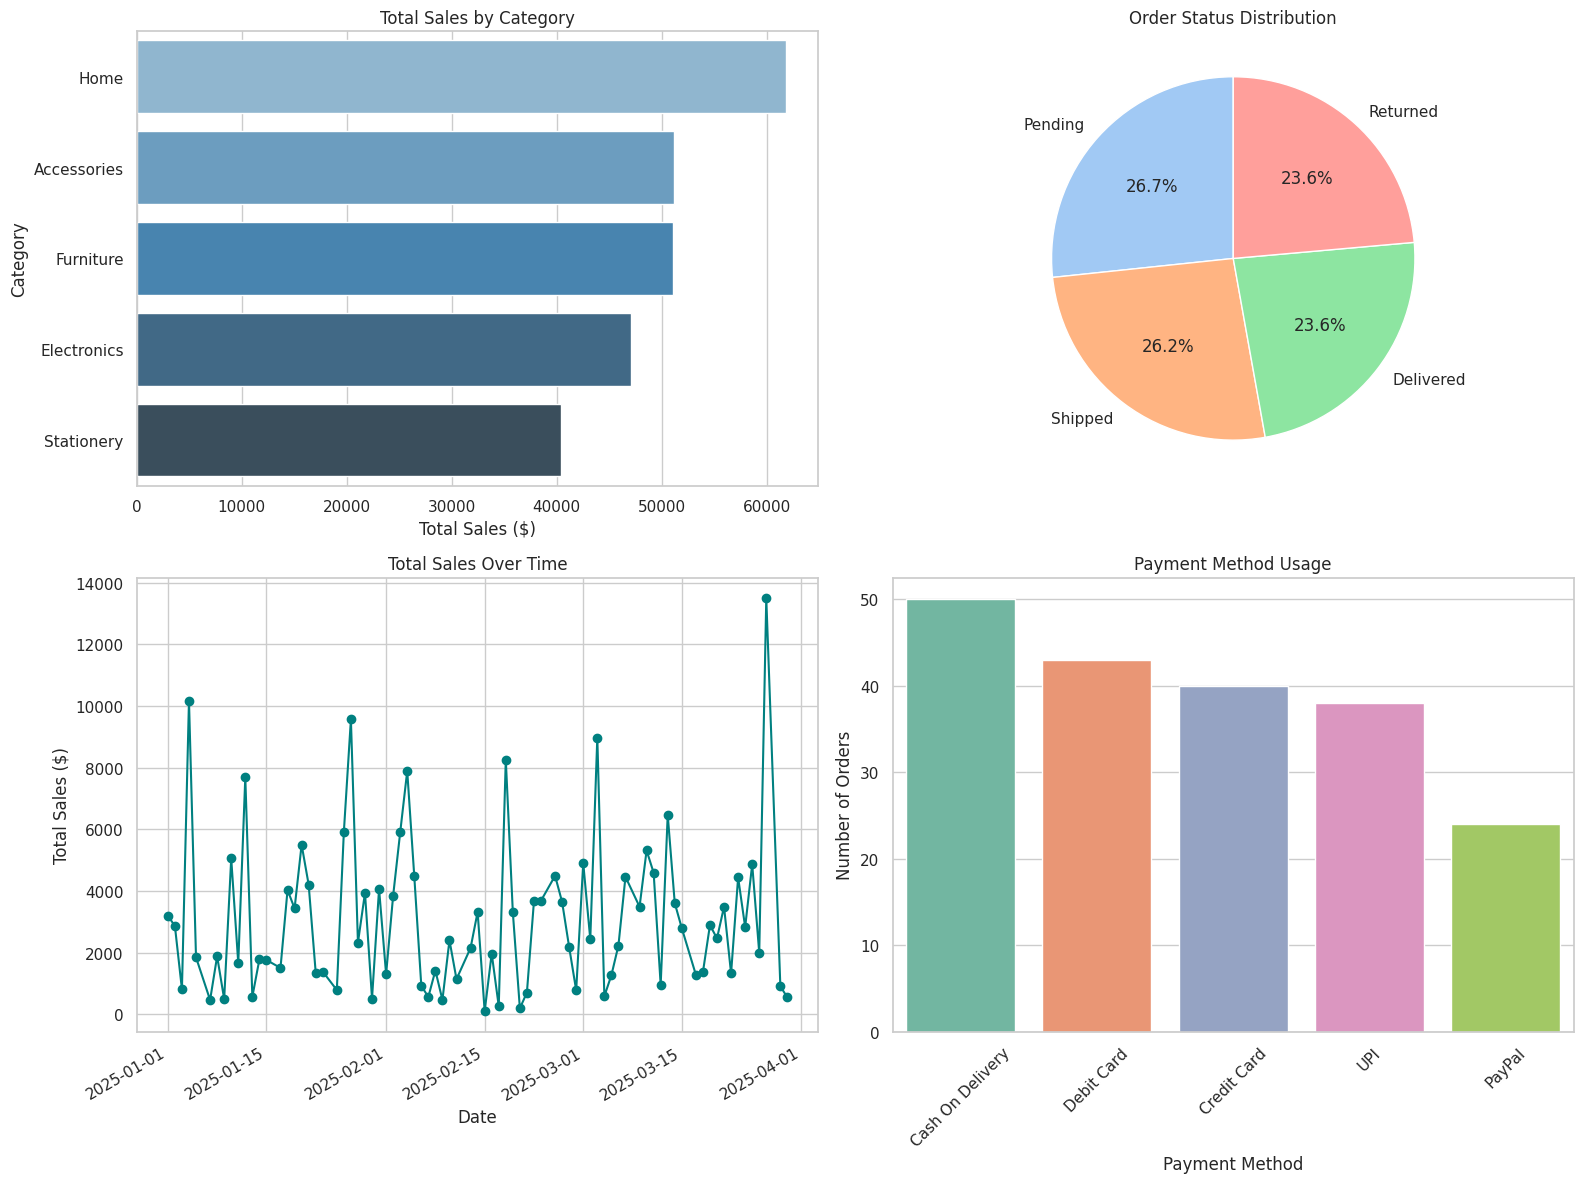

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "unstructured_amazon_sales_data_2025.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# Data Cleaning
df['Price($)'] = df['Price($)'].replace('[\$,]', '', regex=True).astype(float)
df['Qty'] = df['Qty'].str.extract('(\d+)').astype(int)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Cleaned dataframe
df_cleaned = df.copy()

# Aggregations for plotting
category_sales = df_cleaned.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
order_status_counts = df_cleaned['Order_Status'].value_counts()
daily_sales = df_cleaned.groupby('Date')['Total Sales'].sum()
payment_counts = df_cleaned['Payment'].value_counts()

# Plotting setup
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Category-wise Sales
sns.barplot(x=category_sales.values, y=category_sales.index, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Total Sales by Category")
axes[0, 0].set_xlabel("Total Sales ($)")
axes[0, 0].set_ylabel("Category")

# Order Status Pie Chart
order_status_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], colors=sns.color_palette("pastel"), startangle=90)
axes[0, 1].set_title("Order Status Distribution")
axes[0, 1].set_ylabel('')

# Sales Over Time
daily_sales.plot(ax=axes[1, 0], color='teal', marker='o')
axes[1, 0].set_title("Total Sales Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Total Sales ($)")

# Payment Method Distribution
sns.barplot(x=payment_counts.index, y=payment_counts.values, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Payment Method Usage")
axes[1, 1].set_xlabel("Payment Method")
axes[1, 1].set_ylabel("Number of Orders")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_data = df[['Price($)', 'Qty', 'Total Sales']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# View cluster distribution
print(df['Cluster'].value_counts())


Cluster
2    84
0    62
1    49
Name: count, dtype: int64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load original file
df= pd.read_excel("/content/unstructured_amazon_sales_data_2025.xlsx")
# Aggregate sales per day
# Changed 'Date' to 'date' to match the cleaned column name
daily_sales = df.groupby('Date')['Total Sales'].sum()

# Fit ARIMA model (simple example)
model = ARIMA(daily_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 7 days
forecast = model_fit.forecast(steps=7)
print(forecast)

81    3203.572006
82    3087.801901
83    3072.245709
84    3070.155401
85    3069.874524
86    3069.836782
87    3069.831710
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give